In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('./heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [26]:
data.shape

(299, 13)

In [27]:
target_col='DEATH_EVENT'

In [28]:
X = data.drop(target_col, axis=1)
Y = data[[target_col]]

In [29]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [30]:
Y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [32]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (239, 12)
X_test: (60, 12)
Y_train: (239, 1)
Y_test: (60, 1)


In [33]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, Y_train)

/home/artyom/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=10000)

In [34]:
f1_score(Y_test, SGD.predict(X_test), average='micro')
precision_score(Y_test, SGD.predict(X_test), average='micro')

0.6166666666666667

In [35]:
SVC = SVC(kernel='rbf')
SVC.fit(X_train, Y_train)

/home/artyom/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [36]:
f1_score(Y_test, SVC.predict(X_test), average='micro')
precision_score(Y_test, SVC.predict(X_test), average='micro')

0.6166666666666667

In [37]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
f1_score(Y_test, DT.predict(X_test), average='micro')
precision_score(Y_test, DT.predict(X_test), average='micro')

0.75

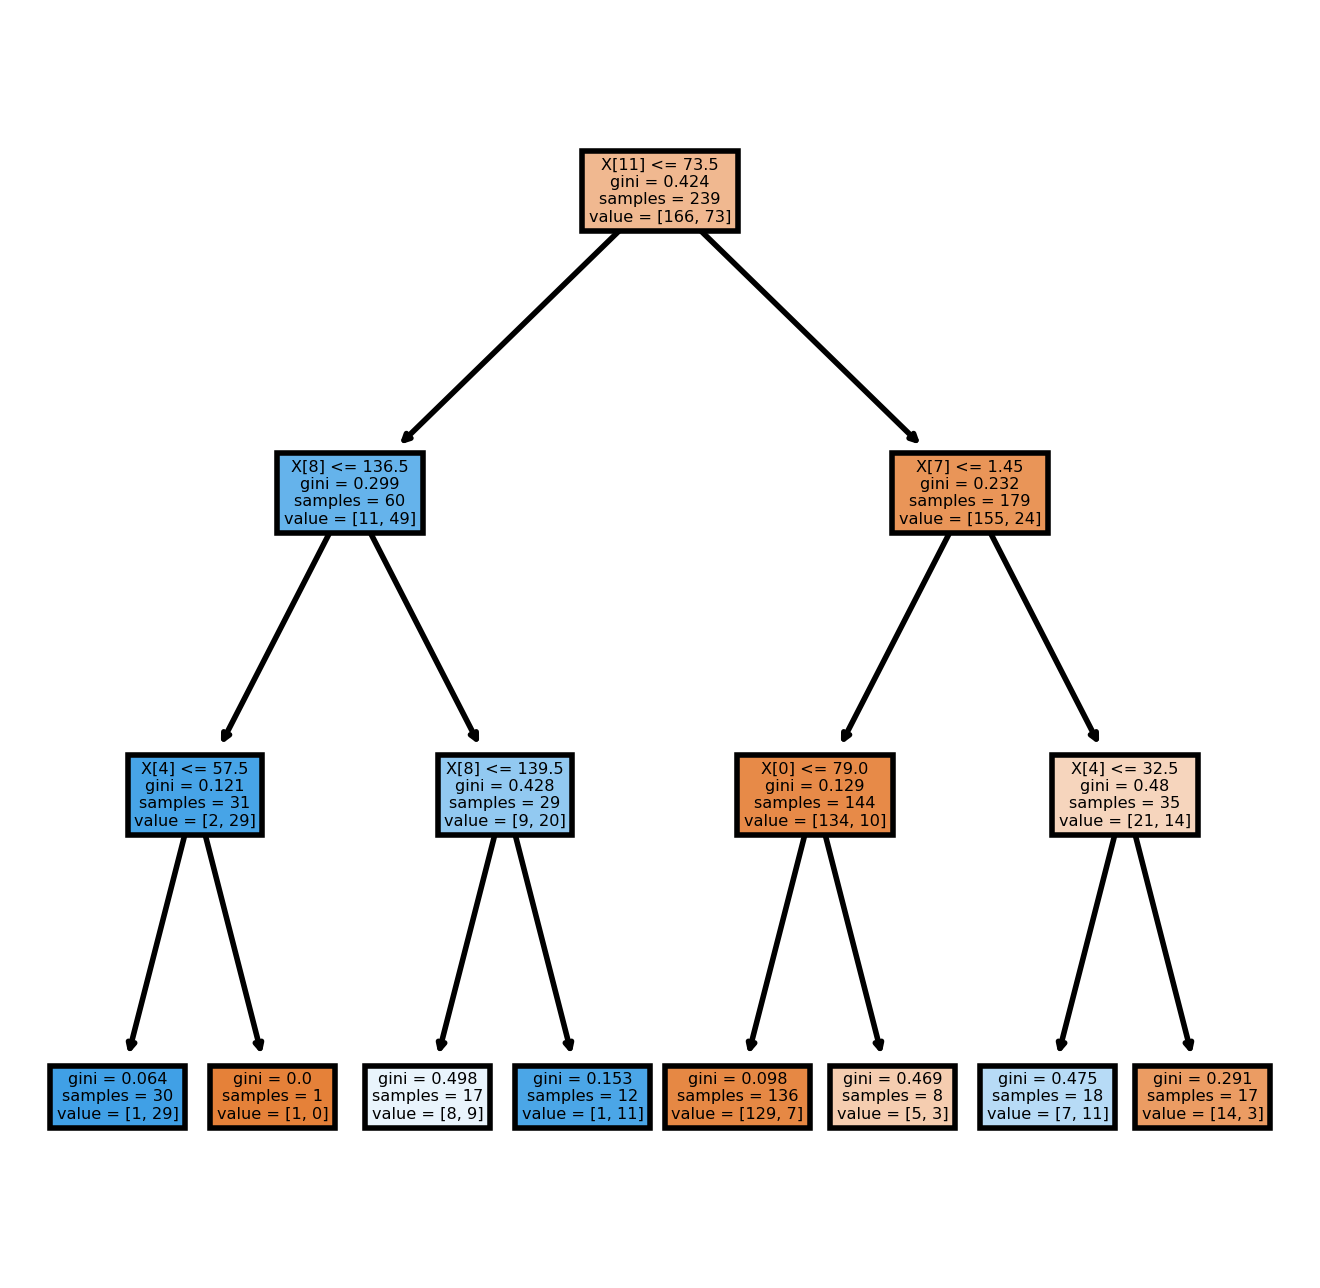

In [39]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True);